In [1]:
import tensorflow as ts
import keras as kr
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
(train_in_pre, train_out_pre), (test_in_pre, test_out_pre) = mnist.load_data()



In [2]:
all_input = []
all_output = []
test_in = []
test_out = []
def inpconv(old, length):
    newl = []
    for i in range (int(length//2)):
        for j in range (int(length//2)):
            n = int(old[2*i+1][2*j+1]) + int(old[2*i+1][2*j]) + int(old[2*i][2*j+1]) + int(old[2*i][2*j])
            if (n > 350):
                newl += [1]
            else:
                newl += [0]
    return newl


if not type(train_in_pre) == list:
    train_in_pre = train_in_pre.tolist()
for i in range(int(len(train_in_pre))):
    all_input += [inpconv(train_in_pre[i], 28)]#lista list pikseli w obrazku

if not type(test_in_pre) == list:
    test_in_pre = test_in_pre.tolist()
for i in range(int(len(test_in_pre))):
    test_in += [inpconv(test_in_pre[i], 28)]

    
for i in range(len(train_out_pre)):
    all_output += [[(1 if train_out_pre[i] == j else 0) for j in range(10)]]

for i in range(len(test_out_pre)):
    test_out += [[(1 if test_out_pre[i] == j else 0) for j in range(10)]]
    



In [3]:
val_in = all_input[0:750]
train_in = all_input[750:7500]
val_out = all_output[0:750]
train_out = all_output[750:7500]

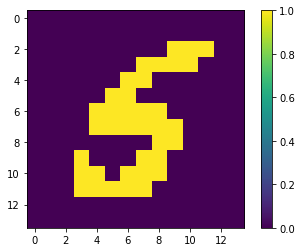

In [4]:
#this shows us the image from the combined pixels
def plot_digit(image):
    pixels = []
    for i in range(14):
        pixels += [image[14*i : 14*(i+1)]]

    plt.figure()
    plt.imshow(pixels)
    plt.colorbar()
    plt.grid(False)
    plt.show()
plot_digit(train_in[21])

In [5]:
#this creates a neural layer
lay = [kr.layers.Dense(units = 40 , activation = 'relu', input_shape = [196]), 
kr.layers.Dense(units = 40 , activation = 'sigmoid'),
kr.layers.Dense(units = 25 , activation = 'relu'),
kr.layers.Dense(units = 20 , activation = 'sigmoid'),
kr.layers.Dense(units = 10)]
      
      
# units is the amount of neurons in a layer
neural_net = kr.Sequential(lay)

In [6]:
neural_net.compile(
    optimizer='adam', #hill climbing function
    loss=kr.losses.CategoricalCrossentropy(from_logits=True), #estimated bias
    metrics=['binary_accuracy'] #how we measure how the program is doing
)

Epoch 1/100
422/422 [==============================] - 116s 274ms/step - loss: 1.8196 - binary_accuracy: 0.8193 - val_loss: 1.2411 - val_binary_accuracy: 0.7807
Epoch 2/100
422/422 [==============================] - 0s 676us/step - loss: 0.9887 - binary_accuracy: 0.7934 - val_loss: 0.8078 - val_binary_accuracy: 0.8029
Epoch 3/100
422/422 [==============================] - 0s 684us/step - loss: 0.6788 - binary_accuracy: 0.8165 - val_loss: 0.6201 - val_binary_accuracy: 0.8136
Epoch 4/100
422/422 [==============================] - 0s 675us/step - loss: 0.5204 - binary_accuracy: 0.8273 - val_loss: 0.5206 - val_binary_accuracy: 0.8283
Epoch 5/100
422/422 [==============================] - 0s 673us/step - loss: 0.4244 - binary_accuracy: 0.8365 - val_loss: 0.4750 - val_binary_accuracy: 0.8385
Epoch 6/100
422/422 [==============================] - 0s 693us/step - loss: 0.3583 - binary_accuracy: 0.8476 - val_loss: 0.4390 - val_binary_accuracy: 0.8500
Epoch 7/100
422/422 [=======================

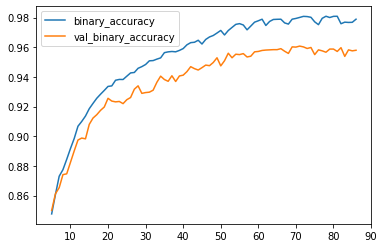

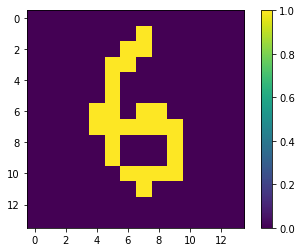

[[  0.02029853  -5.9244413   -0.3871919   -9.928994    -4.668625
   -2.9940405    6.090712   -14.956843     0.39036363  -8.031038  ]] None
313/313 - 0s - loss: 0.5298 - binary_accuracy: 0.9595


In [7]:
callback1 = kr.callbacks.EarlyStopping(
monitor='val_binary_accuracy',
mode='auto',    
patience=15,
)
callback2 = kr.callbacks.ReduceLROnPlateau(monitor='val_binary_accuracy',
mode = 'max',
factor=0.2,
patience=5, min_lr=0.001)


history = neural_net.fit(
train_in,
train_out,
validation_data=(val_in, val_out),
batch_size = 16, #ile sampli przed verification
epochs = 100,  #ile razy przelecicec przez caly dataset,
verbose = 1, #print logs about how it is going
callbacks = [callback1, callback2]
)

history = pd.DataFrame(history.history) #changing history to pandas database
history.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()
print(neural_net.predict([test_in[21]]), plot_digit(test_in[21]))

test_loss, test_acc = neural_net.evaluate(test_in, test_out, verbose=2)

In [11]:
neural_net.save('96handwriter')

INFO:tensorflow:Assets written to: 96handwriter\assets
